# Preliminary operation and Import Packages

2.9 version of TensorFlow/Keras, because some data augmentation techniques are particularly slow

In [ ]:
%pip install tensorflow-gpu==2.8.3 
%pip install -U scikit-learn

In [ ]:
!nvidia-smi

Mon Feb  6 21:40:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.24       Driver Version: 528.24       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P0    N/A /  N/A |    214MiB /  2048MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:41:10_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3053378521526046220
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1297474971
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2118325974425920900
physical_device_desc: "device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
# Keras e TF

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation, AveragePooling2D, Input, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras import regularizers
from tensorflow import initializers
from keras.layers import LSTM
# from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.models import load_model
from keras.layers import Activation

# Sk-Learn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Image management
import cv2

from time import time
import sys
import os
import glob2 as glob
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.linalg import fractional_matrix_power

from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.utils import class_weight 

import pydot
import pydotplus
from pydotplus import graphviz

In [ ]:
# Set the directory where the label  is stored

# path = 'C:/Users/marco/Desktop/Local_Documents/data'
# os.chdir(path=path)

In [ ]:
# Set visualization size for figures 
plt.rcParams['figure.figsize'] = [10,10] # width, height

# Data exploration

In [ ]:
os.getcwd()

'c:\\Users\\marco\\OneDrive\\UNIMIB_DataScience\\99-PROJECTS\\DSIM_Project\\chest-xrays-classification-generation'

In [ ]:
# Import annotation (train, test)
train_label =pd.read_csv('Data\\COVIDx-splitted-resized\\train_COVIDx9A.txt', sep = ' ', header=None)
test_label = pd.read_csv('Data\\COVIDx-splitted-resized\\test_COVIDx9A.txt', sep= ' ', header=None)

In [ ]:
# Set column names and remove unnecessary ones

train_label.columns=['patient id', 'img_path', 'label', 'data source']
# train_label=train_label.drop(['patient id', 'data source'], axis=1 )

test_label.columns=['patient id', 'img_path', 'label', 'data source']
# test_label=test_label.drop(['patient id', 'data source'], axis=1 )

In [ ]:
train_label.head(5)

patient id                                           img_path      label  \
0          3  pneumonia/SARS-10.1148rg.242035193-g04mr34g0-F...  pneumonia   
1          3  pneumonia/SARS-10.1148rg.242035193-g04mr34g0-F...  pneumonia   
2          3  pneumonia/SARS-10.1148rg.242035193-g04mr34g0-F...  pneumonia   
3          7  pneumonia/SARS-10.1148rg.242035193-g04mr34g04a...  pneumonia   
4          7  pneumonia/SARS-10.1148rg.242035193-g04mr34g04b...  pneumonia   

  data source  
0       cohen  
1       cohen  
2       cohen  
3       cohen  
4       cohen

In [ ]:
train_label.shape

(30130, 4)

In [ ]:
test_label.shape

(400, 4)

In [ ]:
test_label.head(5)

patient id                                           img_path     label  \
0  419639-003251  COVID-19/MIDRC-RICORD-1C-419639-003251-46647-0...  COVID-19   
1  419639-001464  COVID-19/MIDRC-RICORD-1C-419639-001464-39871-0...  COVID-19   
2  419639-000918  COVID-19/MIDRC-RICORD-1C-419639-000918-78965-0...  COVID-19   
3  419639-003318  COVID-19/MIDRC-RICORD-1C-419639-003318-64285-0...  COVID-19   
4  419639-001015  COVID-19/MIDRC-RICORD-1C-419639-001015-81591-0...  COVID-19   

  data source  
0      ricord  
1      ricord  
2      ricord  
3      ricord  
4      ricord

<AxesSubplot: xlabel='label', ylabel='Count'>

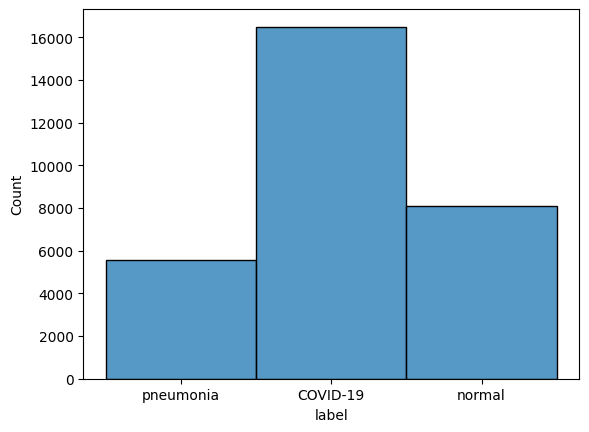

In [ ]:
sns.histplot(train_label['label'], discrete=True)

In [ ]:
train_label['label'].value_counts()

COVID-19     16490
normal        8085
pneumonia     5555
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='Count'>

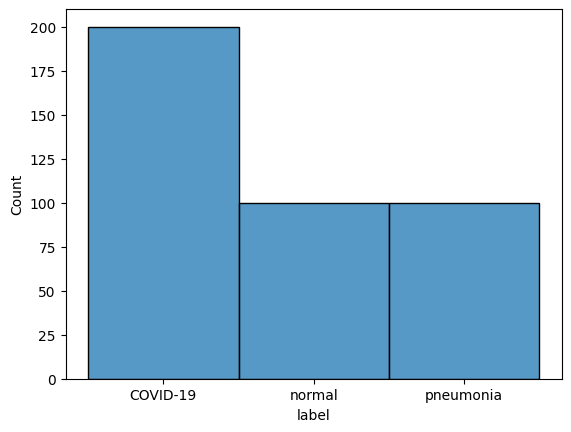

In [ ]:
sns.histplot(test_label['label'], discrete=True)

In [ ]:
test_label['label'].value_counts()

COVID-19     200
normal       100
pneumonia    100
Name: label, dtype: int64